<a href="https://colab.research.google.com/github/nijinpaul/Assignments/blob/main/ASSIGNMENT_TEXT_MINING_(AMAZON_REVIEWS_SENTIMENT_ANALYSIS)Rev0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
import requests
from bs4 import BeautifulSoup
import seaborn as sns
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [47]:
link='https://www.amazon.in/Apple-iPhone-13-128GB-Midnight/product-reviews/B09G9HD6PD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'


In [48]:

## Getting reviews of first five pages
data=[]

for k in range(0,6):
    review=link+'&pageNumber='+str(k)
    print(review)
    page=requests.get(review)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        data.append(reviews[i].get_text().strip())

https://www.amazon.in/Apple-iPhone-13-128GB-Midnight/product-reviews/B09G9HD6PD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Apple-iPhone-13-128GB-Midnight/product-reviews/B09G9HD6PD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Apple-iPhone-13-128GB-Midnight/product-reviews/B09G9HD6PD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Apple-iPhone-13-128GB-Midnight/product-reviews/B09G9HD6PD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Apple-iPhone-13-128GB-Midnight/product-reviews/B09G9HD6PD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Apple-iPhone-13-128GB-Midnight/product-reviews/B09G9HD6PD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5


In [49]:
data

["Got it for 65K on Amazon prime day. So as a lifelong android user I have switched to IOS. So will be dividing this into the pros and negs:Product red 128GBPros:1) Received genuine product from Amazon( was quite sceptic about it though)2) Built quality excellent3) Camera quality excellent. True to life color reproduction, Indoor conditions amazing, night photos are good, facial tones are very good, day clicks are amazing. In short it's an amazing exp. Selfie cam also produces very good quality images. And also no shift in dynamic range while shifting B/W wide and ultra wide cams.4) Display:- Its a really great display, not 120 hz, but the experience is no less than a 120 hz, coz of apple's great software optimization, buttery smooth, no jitters on the screen, won't feel like a 60 hz panel. Now the notch, yes it will be bothering a little bit but its got its own functions, face unlock and stuff (works great in all environmental conditions)after a little while you get adjusted and it go

In [50]:
len(data)

50

In [51]:
df=pd.DataFrame({'Reviews':data})
pd.set_option('max_colwidth', 800)
df

,Reviews
0,"Got it for 65K on Amazon prime day. So as a lifelong android user I have switched to IOS. So will be dividing this into the pros and negs:Product red 128GBPros:1) Received genuine product from Amazon( was quite sceptic about it though)2) Built quality excellent3) Camera quality excellent. True to life color reproduction, Indoor conditions amazing, night photos are good, facial tones are very good, day clicks are amazing. In short it's an amazing exp. Selfie cam also produces very good quality images. And also no shift in dynamic range while shifting B/W wide and ultra wide cams.4) Display:- Its a really great display, not 120 hz, but the experience is no less than a 120 hz, coz of apple's great software optimization, buttery smooth, no jitters on the screen, won't feel like a 60 hz pan..."
1,"I am very pleased that I bought the original iphone 13.Just shifted from Android to iOS .. The new iphone 13 is a great phone with a lot of improvements. It has the best camera on the market..it works good in low light, the software is much improved, and the battery life is long lasting.Got this for - 66 K"
2,"Likes -1. A good display2. Great dual speaker sound quality3. It’s fast. I am using for more than a month and it never hanged.4. Updated to IOS 16 and unlike Android phones it is bug free or has very less bugs5. Long term software & security support (a very few Android phone manufacturers gives 5 years OS support with less bugs)6. Consistent camera. I would say the camera is not so hi fi but takes consistently good photos7. Apps are well optimized. Even google apps like YouTube, Maps, Gmail etc works better in IOS rather than their own proprietary OS8. Widgets in IOS 15 and 16. Android has widgets for decades now but IOS took the user experience to a whole new level.9. The new boxy design (introduced with iPhone 12) is cool and looks good.10. Network & call quality is good.11. Haptic f..."
3,Amazing experience and believe me by switching from android will give confidence in day to day life too.
4,Good deal and a value for money product. Happy with the performance.
5,"LITTLE DOUBTFUL EARLIER SINCE IT IS FOR THE FIRST TIME I HAVE PURCHASE ANYTHING OF THIS HEFTY AMOUNT OF MONEY THROUGH AMAZON , BUT NOW 100% SATISFIED, I THANK AMAZON AND APPLE FOR KEEPING THIS CONFIDENCE AND TRUST....GOT BEST DEAL THRU AMAZON - IN MARKET IT IS APPROX 7000/- COSTLIER....ALSO RECEIVED INVOICE BILL AND PACKING SLIP ALONG WITH IT. NOW JUST WANTED TO VISIT APPLE SERVICE CENTER FOR FURTHER REGISTRATION AND WARRANTY CONFIRMATION."
6,Well except that the product delivered was manufactured way back in April and the box looked old from outside. I didn't find anything negative. The phone works normal till date. Amazing camera. Loved how it syncs automatically with the iPad and how they work together to make my life tad a bit easier.
7,Apple is apple. 10 plus years long term user.
8,Delivery is pretty quick got in one day .Camera quality is very good and phone is supersmooth just like a butter and this is 256 Gb variant .Thanks amazon and Appario for selling original product in well discounted price.
9,Apple cheap company does not give a charger in the box.


In [52]:
import re

In [53]:
## Converting letters to lower case

df['cleaned_reviews']=[x.lower()for x in df.Reviews]
df.head()

,Reviews,cleaned_reviews
0,"Got it for 65K on Amazon prime day. So as a lifelong android user I have switched to IOS. So will be dividing this into the pros and negs:Product red 128GBPros:1) Received genuine product from Amazon( was quite sceptic about it though)2) Built quality excellent3) Camera quality excellent. True to life color reproduction, Indoor conditions amazing, night photos are good, facial tones are very good, day clicks are amazing. In short it's an amazing exp. Selfie cam also produces very good quality images. And also no shift in dynamic range while shifting B/W wide and ultra wide cams.4) Display:- Its a really great display, not 120 hz, but the experience is no less than a 120 hz, coz of apple's great software optimization, buttery smooth, no jitters on the screen, won't feel like a 60 hz pan...","got it for 65k on amazon prime day. so as a lifelong android user i have switched to ios. so will be dividing this into the pros and negs:product red 128gbpros:1) received genuine product from amazon( was quite sceptic about it though)2) built quality excellent3) camera quality excellent. true to life color reproduction, indoor conditions amazing, night photos are good, facial tones are very good, day clicks are amazing. in short it's an amazing exp. selfie cam also produces very good quality images. and also no shift in dynamic range while shifting b/w wide and ultra wide cams.4) display:- its a really great display, not 120 hz, but the experience is no less than a 120 hz, coz of apple's great software optimization, buttery smooth, no jitters on the screen, won't feel like a 60 hz pan..."
1,"I am very pleased that I bought the original iphone 13.Just shifted from Android to iOS .. The new iphone 13 is a great phone with a lot of improvements. It has the best camera on the market..it works good in low light, the software is much improved, and the battery life is long lasting.Got this for - 66 K","i am very pleased that i bought the original iphone 13.just shifted from android to ios .. the new iphone 13 is a great phone with a lot of improvements. it has the best camera on the market..it works good in low light, the software is much improved, and the battery life is long lasting.got this for - 66 k"
2,"Likes -1. A good display2. Great dual speaker sound quality3. It’s fast. I am using for more than a month and it never hanged.4. Updated to IOS 16 and unlike Android phones it is bug free or has very less bugs5. Long term software & security support (a very few Android phone manufacturers gives 5 years OS support with less bugs)6. Consistent camera. I would say the camera is not so hi fi but takes consistently good photos7. Apps are well optimized. Even google apps like YouTube, Maps, Gmail etc works better in IOS rather than their own proprietary OS8. Widgets in IOS 15 and 16. Android has widgets for decades now but IOS took the user experience to a whole new level.9. The new boxy design (introduced with iPhone 12) is cool and looks good.10. Network & call quality is good.11. Haptic f...","likes -1. a good display2. great dual speaker sound quality3. it’s fast. i am using for more than a month and it never hanged.4. updated to ios 16 and unlike android phones it is bug free or has very less bugs5. long term software & security support (a very few android phone manufacturers gives 5 years os support with less bugs)6. consistent camera. i would say the camera is not so hi fi but takes consistently good photos7. apps are well optimized. even google apps like youtube, maps, gmail etc works better in ios rather than their own proprietary os8. widgets in ios 15 and 16. android has widgets for decades now but ios took the user experience to a whole new level.9. the new boxy design (introduced with iphone 12) is cool and looks good.10. network & call quality is good.11. haptic f..."
3,Amazing experience and believe me by switching from android will give confidence in day to day life too.,amazing experience and believe me 

In [54]:
## Removing numbers and special characters
df['cleaned_reviews']=[re.sub('[^A-Za-z ]+', '',x)for x in df['cleaned_reviews']]
df.head()

,Reviews,cleaned_reviews
0,"Got it for 65K on Amazon prime day. So as a lifelong android user I have switched to IOS. So will be dividing this into the pros and negs:Product red 128GBPros:1) Received genuine product from Amazon( was quite sceptic about it though)2) Built quality excellent3) Camera quality excellent. True to life color reproduction, Indoor conditions amazing, night photos are good, facial tones are very good, day clicks are amazing. In short it's an amazing exp. Selfie cam also produces very good quality images. And also no shift in dynamic range while shifting B/W wide and ultra wide cams.4) Display:- Its a really great display, not 120 hz, but the experience is no less than a 120 hz, coz of apple's great software optimization, buttery smooth, no jitters on the screen, won't feel like a 60 hz pan...",got it for k on amazon prime day so as a lifelong android user i have switched to ios so will be dividing this into the pros and negsproduct red gbpros received genuine product from amazon was quite sceptic about it though built quality excellent camera quality excellent true to life color reproduction indoor conditions amazing night photos are good facial tones are very good day clicks are amazing in short its an amazing exp selfie cam also produces very good quality images and also no shift in dynamic range while shifting bw wide and ultra wide cams display its a really great display not hz but the experience is no less than a hz coz of apples great software optimization buttery smooth no jitters on the screen wont feel like a hz panel now the notch yes it will be bothering a litt...
1,"I am very pleased that I bought the original iphone 13.Just shifted from Android to iOS .. The new iphone 13 is a great phone with a lot of improvements. It has the best camera on the market..it works good in low light, the software is much improved, and the battery life is long lasting.Got this for - 66 K",i am very pleased that i bought the original iphone just shifted from android to ios the new iphone is a great phone with a lot of improvements it has the best camera on the marketit works good in low light the software is much improved and the battery life is long lastinggot this for k
2,"Likes -1. A good display2. Great dual speaker sound quality3. It’s fast. I am using for more than a month and it never hanged.4. Updated to IOS 16 and unlike Android phones it is bug free or has very less bugs5. Long term software & security support (a very few Android phone manufacturers gives 5 years OS support with less bugs)6. Consistent camera. I would say the camera is not so hi fi but takes consistently good photos7. Apps are well optimized. Even google apps like YouTube, Maps, Gmail etc works better in IOS rather than their own proprietary OS8. Widgets in IOS 15 and 16. Android has widgets for decades now but IOS took the user experience to a whole new level.9. The new boxy design (introduced with iPhone 12) is cool and looks good.10. Network & call quality is good.11. Haptic f...",likes a good display great dual speaker sound quality its fast i am using for more than a month and it never hanged updated to ios and unlike android phones it is bug free or has very less bugs long term software security support a very few android phone manufacturers gives years os support with less bugs consistent camera i would say the camera is not so hi fi but takes consistently good photos apps are well optimized even google apps like youtube maps gmail etc works better in ios rather than their own proprietary os widgets in ios and android has widgets for decades now but ios took the user experience to a whole new level the new boxy design introduced with iphone is cool and looks good network call quality is good haptic feedback is awesomedislikes some dislikes are due to...
3,Amazing experience and believe me by switching from android will give confidence in day to day life too.,amazing experience and believe me by switching from android will give c

In [55]:
## Removing short words of length 3 or less
short = re.compile(r'\W*\b\w{1,3}\b')
df['cleaned_reviews']=[short.sub('',x)for x in df['cleaned_reviews']]
df.head()

,Reviews,cleaned_reviews
0,"Got it for 65K on Amazon prime day. So as a lifelong android user I have switched to IOS. So will be dividing this into the pros and negs:Product red 128GBPros:1) Received genuine product from Amazon( was quite sceptic about it though)2) Built quality excellent3) Camera quality excellent. True to life color reproduction, Indoor conditions amazing, night photos are good, facial tones are very good, day clicks are amazing. In short it's an amazing exp. Selfie cam also produces very good quality images. And also no shift in dynamic range while shifting B/W wide and ultra wide cams.4) Display:- Its a really great display, not 120 hz, but the experience is no less than a 120 hz, coz of apple's great software optimization, buttery smooth, no jitters on the screen, won't feel like a 60 hz pan...",amazon prime lifelong android user have switched will dividing this into pros negsproduct gbpros received genuine product from amazon quite sceptic about though built quality excellent camera quality excellent true life color reproduction indoor conditions amazing night photos good facial tones very good clicks amazing short amazing selfie also produces very good quality images also shift dynamic range while shifting wide ultra wide cams display really great display experience less than apples great software optimization buttery smooth jitters screen wont feel like panel notch will bothering little functions face unlock stuff works great environmental conditionsafter little while adjusted magic functions like when when phone rings close detects your presence lowers level performance m...
1,"I am very pleased that I bought the original iphone 13.Just shifted from Android to iOS .. The new iphone 13 is a great phone with a lot of improvements. It has the best camera on the market..it works good in low light, the software is much improved, and the battery life is long lasting.Got this for - 66 K",very pleased that bought original iphone just shifted from android iphone great phone with improvements best camera marketit works good light software much improved battery life long lastinggot this
2,"Likes -1. A good display2. Great dual speaker sound quality3. It’s fast. I am using for more than a month and it never hanged.4. Updated to IOS 16 and unlike Android phones it is bug free or has very less bugs5. Long term software & security support (a very few Android phone manufacturers gives 5 years OS support with less bugs)6. Consistent camera. I would say the camera is not so hi fi but takes consistently good photos7. Apps are well optimized. Even google apps like YouTube, Maps, Gmail etc works better in IOS rather than their own proprietary OS8. Widgets in IOS 15 and 16. Android has widgets for decades now but IOS took the user experience to a whole new level.9. The new boxy design (introduced with iPhone 12) is cool and looks good.10. Network & call quality is good.11. Haptic f...",likes good display great dual speaker sound quality fast using more than month never hanged updated unlike android phones free very less bugs long term software security support very android phone manufacturers gives years support with less bugs consistent camera would camera takes consistently good photos apps well optimized even google apps like youtube maps gmail works better rather than their proprietary widgets android widgets decades took user experience whole level boxy design introduced with iphone cool looks good network call quality good haptic feedback awesomedislikes some dislikes myself being android user decades ugly notch though they made dynamic island with iphone lets accept truth still ugly compared hole punch battery life charging speed lack customization cant p...
3,Amazing experience and believe me by switching from android will give confidence in day to day life too.,amazing experience believe switching from android will give confidence life
4,Good deal and a value for money product. Happy with the performance.,good dea

In [56]:
## Removing StopWords

import nltk
nltk.download("popular")





[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [57]:
## Loading stopwords 
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')

In [58]:
## Checking some random 50 stopwords
import random
print(random.sample(my_stopwords,50))

["you'd", 'him', 'am', 'wouldn', 'was', 'yourself', 'to', 'during', 'until', 'do', 'at', 'weren', 'both', 'own', 'herself', "hasn't", 'll', 'will', 'been', 'down', 'be', 'doesn', 'no', "couldn't", 'into', 'your', 'm', "she's", 'through', 'yours', 'her', 'what', "shan't", 'having', 'which', 'o', 'these', 'an', 'ourselves', 'not', 'again', "hadn't", 'only', 'itself', 'further', "should've", 'than', 'by', 'has', 'few']


In [59]:
## Removing stopwords

df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: ' '.join([item for item in x.split() if item not in my_stopwords]))

In [60]:
df.head()

,Reviews,cleaned_reviews
0,"Got it for 65K on Amazon prime day. So as a lifelong android user I have switched to IOS. So will be dividing this into the pros and negs:Product red 128GBPros:1) Received genuine product from Amazon( was quite sceptic about it though)2) Built quality excellent3) Camera quality excellent. True to life color reproduction, Indoor conditions amazing, night photos are good, facial tones are very good, day clicks are amazing. In short it's an amazing exp. Selfie cam also produces very good quality images. And also no shift in dynamic range while shifting B/W wide and ultra wide cams.4) Display:- Its a really great display, not 120 hz, but the experience is no less than a 120 hz, coz of apple's great software optimization, buttery smooth, no jitters on the screen, won't feel like a 60 hz pan...",amazon prime lifelong android user switched dividing pros negsproduct gbpros received genuine product amazon quite sceptic though built quality excellent camera quality excellent true life color reproduction indoor conditions amazing night photos good facial tones good clicks amazing short amazing selfie also produces good quality images also shift dynamic range shifting wide ultra wide cams display really great display experience less apples great software optimization buttery smooth jitters screen wont feel like panel notch bothering little functions face unlock stuff works great environmental conditionsafter little adjusted magic functions like phone rings close detects presence lowers level performance powerful processor world battery light usage easily days heavy remember follow c...
1,"I am very pleased that I bought the original iphone 13.Just shifted from Android to iOS .. The new iphone 13 is a great phone with a lot of improvements. It has the best camera on the market..it works good in low light, the software is much improved, and the battery life is long lasting.Got this for - 66 K",pleased bought original iphone shifted android iphone great phone improvements best camera marketit works good light software much improved battery life long lastinggot
2,"Likes -1. A good display2. Great dual speaker sound quality3. It’s fast. I am using for more than a month and it never hanged.4. Updated to IOS 16 and unlike Android phones it is bug free or has very less bugs5. Long term software & security support (a very few Android phone manufacturers gives 5 years OS support with less bugs)6. Consistent camera. I would say the camera is not so hi fi but takes consistently good photos7. Apps are well optimized. Even google apps like YouTube, Maps, Gmail etc works better in IOS rather than their own proprietary OS8. Widgets in IOS 15 and 16. Android has widgets for decades now but IOS took the user experience to a whole new level.9. The new boxy design (introduced with iPhone 12) is cool and looks good.10. Network & call quality is good.11. Haptic f...",likes good display great dual speaker sound quality fast using month never hanged updated unlike android phones free less bugs long term software security support android phone manufacturers gives years support less bugs consistent camera would camera takes consistently good photos apps well optimized even google apps like youtube maps gmail works better rather proprietary widgets android widgets decades took user experience whole level boxy design introduced iphone cool looks good network call quality good haptic feedback awesomedislikes dislikes android user decades ugly notch though made dynamic island iphone lets accept truth still ugly compared hole punch battery life charging speed lack customization cant place icons wherever feel like screen lack fingerprint scanner face good fi...
3,Amazing experience and believe me by switching from android will give confidence in day to day life too.,amazing experience believe switching android give confidence life
4,Good deal and a value for money product. Happy with the performance.,good deal value money product happy perfor

#Creating word cloud

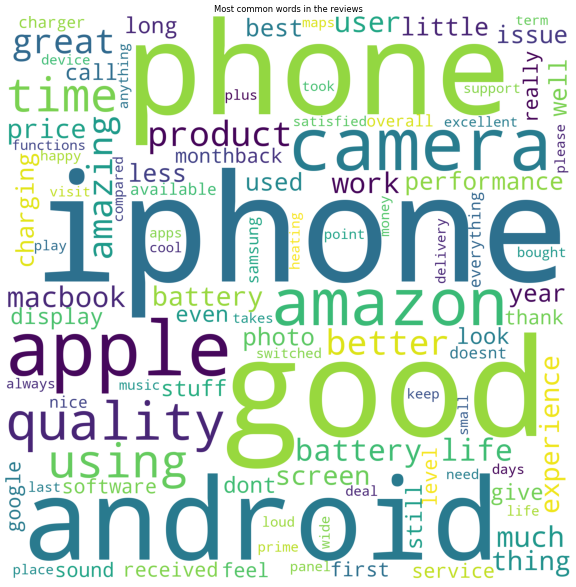

In [61]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

#Sentimental analysis

##Analysis using verder

In [62]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
si = SentimentIntensityAnalyzer()

In [64]:
## Extracting only the compound score
def sentiment_score(text):
    score=si.polarity_scores(text)
    return score['compound']

In [65]:
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x:sentiment_score(x))

In [66]:
pd.set_option('max_colwidth', 500)
df.head()

,Reviews,cleaned_reviews,sentiment_score
0,"Got it for 65K on Amazon prime day. So as a lifelong android user I have switched to IOS. So will be dividing this into the pros and negs:Product red 128GBPros:1) Received genuine product from Amazon( was quite sceptic about it though)2) Built quality excellent3) Camera quality excellent. True to life color reproduction, Indoor conditions amazing, night photos are good, facial tones are very good, day clicks are amazing. In short it's an amazing exp. Selfie cam also produces very good qualit...",amazon prime lifelong android user switched dividing pros negsproduct gbpros received genuine product amazon quite sceptic though built quality excellent camera quality excellent true life color reproduction indoor conditions amazing night photos good facial tones good clicks amazing short amazing selfie also produces good quality images also shift dynamic range shifting wide ultra wide cams display really great display experience less apples great software optimization buttery smooth jitter...,0.9971
1,"I am very pleased that I bought the original iphone 13.Just shifted from Android to iOS .. The new iphone 13 is a great phone with a lot of improvements. It has the best camera on the market..it works good in low light, the software is much improved, and the battery life is long lasting.Got this for - 66 K",pleased bought original iphone shifted android iphone great phone improvements best camera marketit works good light software much improved battery life long lastinggot,0.9674
2,"Likes -1. A good display2. Great dual speaker sound quality3. It’s fast. I am using for more than a month and it never hanged.4. Updated to IOS 16 and unlike Android phones it is bug free or has very less bugs5. Long term software & security support (a very few Android phone manufacturers gives 5 years OS support with less bugs)6. Consistent camera. I would say the camera is not so hi fi but takes consistently good photos7. Apps are well optimized. Even google apps like YouTube, Maps, Gmail ...",likes good display great dual speaker sound quality fast using month never hanged updated unlike android phones free less bugs long term software security support android phone manufacturers gives years support less bugs consistent camera would camera takes consistently good photos apps well optimized even google apps like youtube maps gmail works better rather proprietary widgets android widgets decades took user experience whole level boxy design introduced iphone cool looks good network c...,0.9924
3,Amazing experience and believe me by switching from android will give confidence in day to day life too.,amazing experience believe switching android give confidence life,0.7964
4,Good deal and a value for money product. Happy with the performance.,good deal value money product happy performance,0.8402


In [67]:
## Defining function to assign sentiment category based on sentiment scores
## Score Range -0.5 to 0.5 is considered as neutral
def sentiment_category(score1):
    if(score1 > 0.5):
        return 'Positive'
    elif(score1 < -0.5):
        return 'Negative'
    else:
        return 'Neutral'

In [68]:
df['sentiment'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))
df.head()

,Reviews,cleaned_reviews,sentiment_score,sentiment
0,"Got it for 65K on Amazon prime day. So as a lifelong android user I have switched to IOS. So will be dividing this into the pros and negs:Product red 128GBPros:1) Received genuine product from Amazon( was quite sceptic about it though)2) Built quality excellent3) Camera quality excellent. True to life color reproduction, Indoor conditions amazing, night photos are good, facial tones are very good, day clicks are amazing. In short it's an amazing exp. Selfie cam also produces very good qualit...",amazon prime lifelong android user switched dividing pros negsproduct gbpros received genuine product amazon quite sceptic though built quality excellent camera quality excellent true life color reproduction indoor conditions amazing night photos good facial tones good clicks amazing short amazing selfie also produces good quality images also shift dynamic range shifting wide ultra wide cams display really great display experience less apples great software optimization buttery smooth jitter...,0.9971,Positive
1,"I am very pleased that I bought the original iphone 13.Just shifted from Android to iOS .. The new iphone 13 is a great phone with a lot of improvements. It has the best camera on the market..it works good in low light, the software is much improved, and the battery life is long lasting.Got this for - 66 K",pleased bought original iphone shifted android iphone great phone improvements best camera marketit works good light software much improved battery life long lastinggot,0.9674,Positive
2,"Likes -1. A good display2. Great dual speaker sound quality3. It’s fast. I am using for more than a month and it never hanged.4. Updated to IOS 16 and unlike Android phones it is bug free or has very less bugs5. Long term software & security support (a very few Android phone manufacturers gives 5 years OS support with less bugs)6. Consistent camera. I would say the camera is not so hi fi but takes consistently good photos7. Apps are well optimized. Even google apps like YouTube, Maps, Gmail ...",likes good display great dual speaker sound quality fast using month never hanged updated unlike android phones free less bugs long term software security support android phone manufacturers gives years support less bugs consistent camera would camera takes consistently good photos apps well optimized even google apps like youtube maps gmail works better rather proprietary widgets android widgets decades took user experience whole level boxy design introduced iphone cool looks good network c...,0.9924,Positive
3,Amazing experience and believe me by switching from android will give confidence in day to day life too.,amazing experience believe switching android give confidence life,0.7964,Positive
4,Good deal and a value for money product. Happy with the performance.,good deal value money product happy performance,0.8402,Positive


In [69]:
## calculating the categories of sentiments and their counts
df['sentiment'].value_counts()

Positive    28
Neutral     20
Negative     2
Name: sentiment, dtype: int64

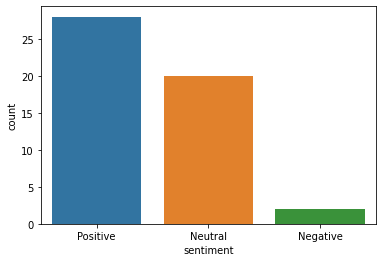

In [70]:
sns.countplot(x=df['sentiment'])

#From the above plot it is clear that almost people purchased iPhone 13 128GB Midnight has positive feedback